In [1]:
from google.colab import files
uploaded = files.upload()

Saving nigeria_houses_data.csv to nigeria_houses_data.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import r2_score, confusion_matrix, classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv('/Users/macbook/Documents/Msquare/nigeria_houses_data.csv')

In [3]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


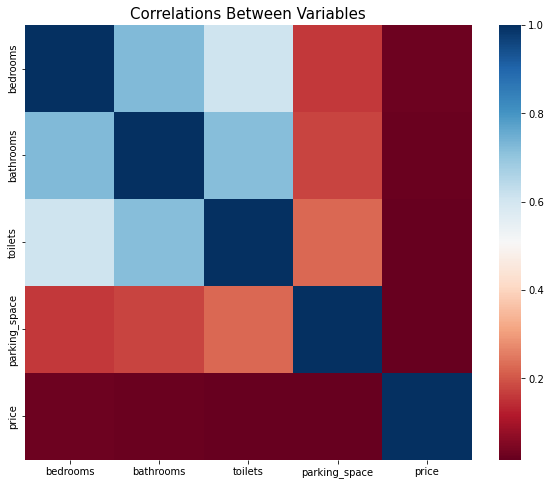

In [4]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [5]:
median = statistics.median(df['price'])

In [6]:
df1 = df.loc[df['price']<median]

In [7]:
df1['target'] = 0

/var/folders/gj/z53cvrpd30d77qk7sj0vwwk80000gp/T/ipykernel_20180/4287452773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['target'] = 0


In [8]:
df2 = df.loc[df['price']>median]

In [9]:
df2['target']=1

/var/folders/gj/z53cvrpd30d77qk7sj0vwwk80000gp/T/ipykernel_20180/3054891404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['target']=1


In [10]:
df3 = df1.append(df2, ignore_index=True)

/var/folders/gj/z53cvrpd30d77qk7sj0vwwk80000gp/T/ipykernel_20180/3686251815.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2, ignore_index=True)


In [11]:
df = df3

In [12]:
df = df.drop('price', axis =1)

In [13]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['toilets'] = df['toilets'].astype(int)
df['parking_space'] = df['parking_space'].astype(int)

In [14]:
df = df.drop(['title','state','town'], axis=1)

In [15]:
dataset = df.values

In [16]:
dataset=dataset.astype(int)

In [17]:
dataset

array([[4, 4, 5, 6, 0],
       [4, 4, 5, 2, 0],
       [4, 5, 5, 4, 0],
       ...,
       [5, 5, 6, 5, 1],
       [4, 5, 5, 4, 1],
       [8, 8, 9, 4, 1]])

In [18]:
X = dataset[:,0:4]
y = dataset[:,4]

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scale = scaler.fit_transform(X)
X_scale

array([[0.375, 0.375, 0.5  , 0.625],
       [0.375, 0.375, 0.5  , 0.125],
       [0.375, 0.5  , 0.5  , 0.375],
       ...,
       [0.5  , 0.5  , 0.625, 0.5  ],
       [0.375, 0.5  , 0.5  , 0.375],
       [0.875, 0.875, 1.   , 0.375]])

In [20]:
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X_scale,y,test_size=0.20)
X_test, X_val, y_test, y_val = train_test_split(X_test_and_val, y_test_and_val, test_size=0.50)
print(X_train.shape,y_train.shape)

(18983, 4) (18983,)


# KNN

0.7475769068689423
              precision    recall  f1-score   support

           0       0.81      0.65      0.72      1180
           1       0.71      0.85      0.77      1193

    accuracy                           0.75      2373
   macro avg       0.76      0.75      0.74      2373
weighted avg       0.76      0.75      0.74      2373



Text(42.0, 0.5, 'y')

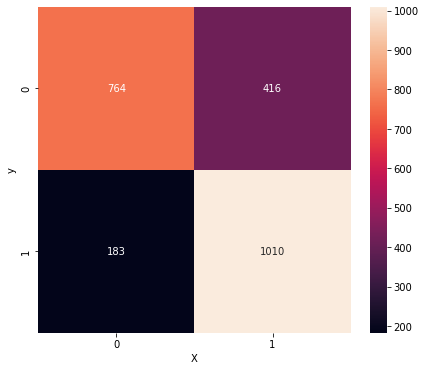

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_test,Y_pred_knn))
print(classification_report(y_test,Y_pred_knn))
cm = confusion_matrix(y_test,Y_pred_knn)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('y')

# NAIVE BAYES

0.7399915718499789
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1180
           1       0.72      0.80      0.76      1193

    accuracy                           0.74      2373
   macro avg       0.74      0.74      0.74      2373
weighted avg       0.74      0.74      0.74      2373



Text(42.0, 0.5, 'y')

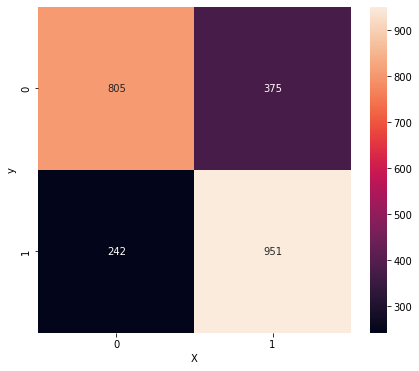

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train,y_train)

predictions = nb.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('y')

# SVM

0.7901390644753477
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1180
           1       0.81      0.76      0.78      1193

    accuracy                           0.79      2373
   macro avg       0.79      0.79      0.79      2373
weighted avg       0.79      0.79      0.79      2373



Text(42.0, 0.5, 'y')

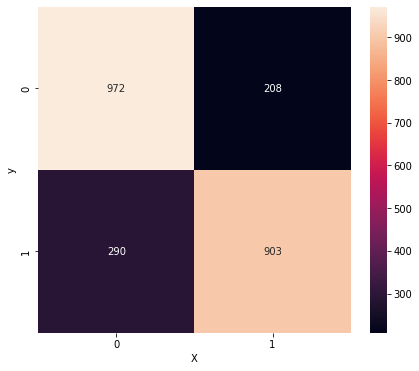

In [34]:
from sklearn.svm import SVC

model = SVC(kernel='linear') 
model.fit(X_train,y_train)
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('X')
plt.ylabel('y')